In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [3]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [4]:
# Convert categorical data to numeric and separate target feature for training data
X = train_df.drop('loan_status', axis=1)
y = train_df[["loan_status"]]

y

,loan_status
0,low_risk
1,low_risk
2,low_risk
3,low_risk
4,low_risk
...,...
12175,high_risk
12176,high_risk
12177,high_risk
12178,high_risk


In [5]:
# Convert categorical data to numeric and separate target feature for testing data


# One-hot encoding the entire dataframe

X = pd.get_dummies(X)

y = y['loan_status'].apply(lambda x: 1 if x == 'high_risk' else 0)
type(y)


pandas.core.series.Series

In [6]:
# add missing dummy variables to testing set

print(X.size)
print(y.size)

1144920
12180


You will be creating and comparing two models on this data: a logistic regression, and a random forests classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! Write down (in markdown cells in your Jupyter Notebook or in a separate document) your prediction, and provide justification for your educated guess.


I believe the random forest model will work better because there are a lot more x values to work with. I believe that using the logistical regression with so many x values might throw off the model.








In [7]:
# Train the Logistic Regression model on the unscaled data and print the model score


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")



Training Data Score: 0.6551724137931034
Testing Data Score: 0.6433497536945813


c:\Users\Johna\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Score: 1.0
Testing Score: 0.7937602627257799


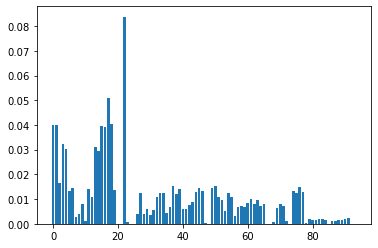

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [8]:
# Train a Random Forest Classifier model and print the model score

# Create data

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

features = clf.feature_importances_
#print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()



from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()


Create a LogisticRegression model, fit it to the data, and print the model's score. Do the same for a RandomForestClassifier. You may choose any starting hyperparameters you like. Which model performed better? How does that compare to your prediction? Write down your results and thoughts.


The random forrest model worked better as I predicted.

In [9]:
#Scale the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(sel.transform(X_train), y_train, random_state=1)

scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)


print(X_selected_train_scaled.shape)
print(X_train.shape)
print(X_selected_test_scaled.shape)
print(X_test.shape)



(6851, 36)
(9135, 94)
(2284, 36)
(3045, 94)


In [10]:
# Train the Logistic Regression model on the scaled data and print the model score

clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.7056376573617953
Testing Score: 0.7155993431855501


c:\Users\Johna\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
print(f'X selected train scaled {X_selected_train_scaled.shape}')
print(f'X selected test scaled {X_selected_test_scaled.shape}')

print(f'X train {X_train.shape}')
print(f'X test {X_test.shape}')

print(f'y train {y_train.shape}')
print(f'y test {y_test.shape}')

print(f'y selected train {y_selected_train.shape}')
print(f'y selected test {y_selected_test.shape}')

print(f'y selected train {y_selected_train.shape}')
print(f'y selected test {y_selected_test.shape}')




X selected train scaled (6851, 36)
X selected test scaled (2284, 36)
X train (9135, 94)
X test (3045, 94)
y train (9135,)
y test (3045,)
y selected train (6851,)
y selected test (2284,)
y selected train (6851,)
y selected test (2284,)


In [12]:
# Train a Random Forest Classifier model on the scaled data and print the model score

clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_selected_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_selected_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_selected_test)}')





Training Score: 0.7067581374981754
Testing Score: 0.6900175131348512


The data going into these models was never scaled, an important step in preprocessing. Use `StandardScaler` to scale the training and testing sets. Before re-fitting the LogisticRegression and RandomForestClassifier models on the scaled data, make another prediction about how you think scaling will affect the accuracy of the models. Write your predictions down and provide justification.

Fit and score the LogisticRegression and RandomForestClassifier models on the scaled data. How do the model scores compare to each other, and to the previous results on unscaled data? How does this compare to your prediction? Write down your results and thoughts.


The logistic regression worked slightly better than random forest model but not by much.